<a href="https://colab.research.google.com/github/NidhiS9830/woc5.0-ml-weather-prediction-case-study-Nidhi_Somaiya/blob/main/WOC5_0_ML_Checkpoint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [ ]:
cardata_df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
cardata_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cardata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cardata_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data_index_df=cardata_df[['aspiration','fueltype','doornumber','carbody','drivewheel'
,'enginelocation','enginetype','cylindernumber',]].copy()

for col in data_index_df:
  print(data_index_df[col].unique())


['std' 'turbo']
['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [ ]:
cardata_df.duplicated().sum()

0

#DATA EXPLORATION


 How many cars and which type cars use diesel and gas fuels?

In [ ]:
cardata_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Text(0.5, 1.0, 'Fuel Type')

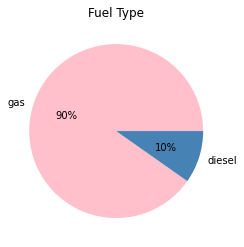

In [ ]:
values=[ 185,20]
labels=["gas","diesel"]
colors=['Pink','steelblue']
plt.pie(values,labels=labels,autopct='%1.0f%%',colors=colors)
plt.title("Fuel Type")

Carbody visualization

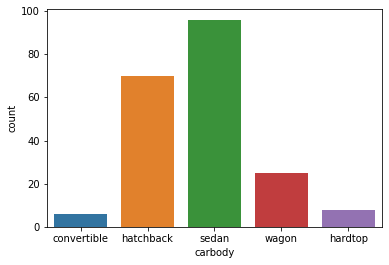

In [ ]:
sns.countplot(x ='carbody', data =cardata_df )
 
# Show the plot
plt.show()

Histogram for car length , car height and car width

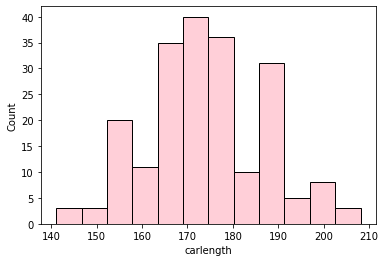

In [ ]:
sns.histplot(data=cardata_df, x="carlength", color="pink")

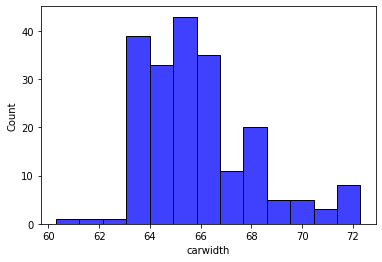

In [ ]:
sns.histplot(data=cardata_df, x="carwidth", color="blue")

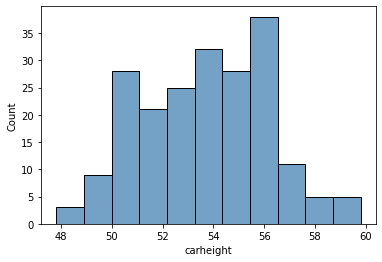

In [ ]:
sns.histplot(data=cardata_df,x="carheight",color='steelblue')

Correlation between variables

In [39]:
label_encoder = preprocessing.LabelEncoder()
  
cardata_df['fueltype']= label_encoder.fit_transform(cardata_df['fueltype'])
  
cardata_df['fueltype'].unique()



array([1, 0])

In [40]:
cardata_df['doornumber']= label_encoder.fit_transform(cardata_df['doornumber'])
  
cardata_df['doornumber'].unique()

array([1, 0])

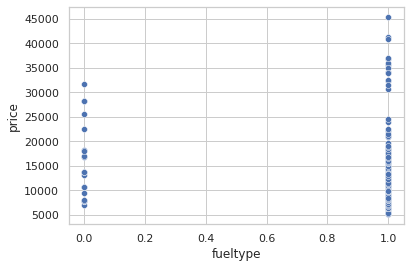

In [43]:


sns.set(style='whitegrid')
sns.scatterplot(x="fueltype",
					y="price",
					data=cardata_df)
